# Table of Contents :
* [1. Introduction](#section1)
* [2. Importing Libraries](#section2)
* [3. Loading Datasets](#section3)
* [4. Data Analysis](#section4)
* [5. Data Visualization](#section5)
* [6. Machine Learning](#section6)
* [7. Conclusion](#section7)

<a id="section1"></a>
# Introduction

## About Dataset

The dataset contains apartment offers from the 15 largest cities in Poland (Warsaw, Lodz, Krakow, Wroclaw, Poznan, Gdansk, Szczecin, Bydgoszcz, Lublin, Katowice, Bialystok, Czestochowa). The data comes from local websites with apartments for sale. To fully capture the neighborhood of each apartment better, each offer was extended by data from the Open Street Map with distances to points of interest (POI). The data is collected monthly and covers timespan between September 2023 and October 2023

## Variables Description

- **city** - the name of the city where the property is located
- **type** - type of the building
- **squareMeters** - the size of the apartment in square meters
- **rooms** - number of rooms in the apartment
- **floor** / floorCount - the floor where the apartment is located and the total number of floors in the building
- **buildYear** - the year when the building was built
- **latitude, longitude** - geo coordinate of the property
- **centreDistance** - distance from the city centre in km
- **poiCount** - number of points of interest in 500m range from the apartment (schools, clinics, post offices, kindergartens, -  - - restaurants, colleges, pharmacies)
- **[poiName]Distance** - distance to the nearest point of interest (schools, clinics, post offices, kindergartens, restaurants, colleges, pharmacies)
- **ownership** - the type of property ownership
- **condition** - the condition of the apartment
- **has[features]** - whether the property has key features such as assigned parking space, balcony, elevator, security, storage room
- **price** - offer price in Polish Zloty

<a id="section2"></a>
# Importing Libraries

In [1]:
# Python version used
from platform import python_version
print('Python Version Used in this Jupyter Notebook:', python_version())

Python Version Used in this Jupyter Notebook: 3.10.12


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from scipy.stats import skew
from sklearn.linear_model import LinearRegression, Ridge, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import log_loss, accuracy_score
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
import graphviz
import xgboost as xgb

<a id="section3"></a>
# Loading Datasets

In [3]:
df_august = pd.read_csv('/kaggle/input/apartment-prices-in-poland/apartments_pl_2023_08.csv')
df_september = pd.read_csv('/kaggle/input/apartment-prices-in-poland/apartments_pl_2023_09.csv')
df_october = pd.read_csv('/kaggle/input/apartment-prices-in-poland/apartments_pl_2023_10.csv')

In [4]:
df_august.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,...,0.413,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000
1,accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,...,0.205,cooperative,concreteSlab,NaN,no,yes,yes,no,yes,395995
2,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000
3,0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,...,0.087,condominium,brick,NaN,yes,yes,no,no,yes,640000
4,f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,...,0.514,condominium,NaN,NaN,no,no,no,no,no,759000


In [5]:
df_september.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,71de9eb8a92ac12d7c94315228b70cfb,szczecin,tenement,123.45,4.0,2.0,3.0,NaN,53.432586,14.535685,...,0.321,condominium,brick,NaN,no,yes,no,no,yes,799000
1,23d558163bb1c7863c73485048e50858,szczecin,NaN,53.80,2.0,5.0,5.0,NaN,53.429429,14.554642,...,0.073,cooperative,NaN,NaN,no,no,yes,no,no,420000
2,3b8819c6c9ffd55adfddfd5bafcc844d,szczecin,tenement,50.00,2.0,NaN,1.0,NaN,53.364400,14.660900,...,0.399,condominium,brick,NaN,yes,no,no,no,no,350000
3,708ccd264180315a4cfe6324ed4861d0,szczecin,blockOfFlats,55.19,2.0,1.0,2.0,2013.0,53.480364,14.541494,...,0.183,condominium,brick,premium,yes,yes,no,yes,yes,607000
4,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000


In [6]:
df_october.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,23d558163bb1c7863c73485048e50858,szczecin,NaN,53.80,2.0,5.0,5.0,NaN,53.429429,14.554642,...,0.073,cooperative,NaN,NaN,no,no,yes,no,no,420000
1,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000
2,ede1c0d953ff85f3cd9676d39ca8f62d,szczecin,blockOfFlats,37.00,2.0,8.0,10.0,1970.0,53.442692,14.559690,...,0.205,cooperative,concreteSlab,NaN,no,yes,yes,yes,yes,429995
3,6c807c6c86a74c57a3fd4445a1f49a46,szczecin,apartmentBuilding,48.00,2.0,4.0,6.0,NaN,53.435461,14.570436,...,0.177,condominium,brick,NaN,no,yes,no,no,no,550000
4,bb14c9a540275da73f6cb6ed42e5c26c,szczecin,apartmentBuilding,55.19,2.0,1.0,2.0,2013.0,53.482094,14.542574,...,0.043,condominium,brick,premium,yes,yes,no,yes,yes,607000


In [7]:
print(df_august.shape)
print(df_september.shape)
print(df_october.shape)

(18905, 28)
(16997, 28)
(16690, 28)


## Concatenating Datasets

In [8]:
df_august['Month'] = 0
df_september['Month'] = 1
df_october['Month'] = 2

In [9]:
frames = [df_august, df_september, df_october]
df = pd.concat(frames)

<a id="section4"></a>
# Data Analysis

In [10]:
# Shape of dataframe
df.shape

(52592, 29)

In [11]:
# Checking for missing values
df.isna().sum()

id                          0
city                        0
type                    11650
squareMeters                0
rooms                       0
floor                    9527
floorCount                750
buildYear                9125
latitude                    0
longitude                   0
centreDistance              0
poiCount                    0
schoolDistance             50
clinicDistance            252
postOfficeDistance         73
kindergartenDistance       49
restaurantDistance        154
collegeDistance          1572
pharmacyDistance           79
ownership                   0
buildingMaterial        20505
condition               39819
hasParkingSpace             0
hasBalcony                  0
hasElevator              2688
hasSecurity                 0
hasStorageRoom              0
price                       0
Month                       0
dtype: int64

In [12]:
# Dropping id and columns which have a very high number of missing values, being impossible to apply techniques such as imputation
df.drop(['id','type', 'floor', 'buildYear', 'floorCount', 'condition', 'buildingMaterial'], axis=1, inplace=True)

In [13]:
df['Month'] = df['Month'].astype(str)

In [14]:
# Dropping remaining missing values
df_clean = df.dropna()

In [15]:
# Dropping duplicates if any
df_clean = df_clean.drop_duplicates().reset_index(drop=True)

In [16]:
df_clean.head(5)

,city,squareMeters,rooms,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,...,collegeDistance,pharmacyDistance,ownership,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,Month
0,szczecin,36.00,2.0,53.442692,14.559690,2.15,16.0,0.273,0.492,0.652,...,1.404,0.205,cooperative,no,yes,yes,no,yes,395995,0
1,szczecin,73.02,3.0,53.452222,14.553333,3.24,9.0,0.275,0.672,0.367,...,1.857,0.280,condominium,no,no,no,no,no,565000,0
2,szczecin,87.60,3.0,53.435100,14.532900,2.27,32.0,0.175,0.259,0.223,...,0.310,0.087,condominium,yes,yes,no,no,yes,640000,0
3,szczecin,66.00,3.0,53.410278,14.503611,4.07,1.0,0.218,1.690,0.504,...,2.138,0.514,condominium,no,no,no,no,no,759000,0
4,szczecin,63.30,3.0,53.463100,14.572800,4.48,10.0,0.079,1.224,0.737,...,0.377,0.745,cooperative,yes,yes,no,no,yes,499000,0


In [17]:
df_clean.shape

(47506, 22)

In [18]:
# Cell in case you want to save the new and clean dataframe to csv.
# df_clean = pd.to_csv('df_all_clean.csv', index=None)

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47506 entries, 0 to 47505
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  47506 non-null  object 
 1   squareMeters          47506 non-null  float64
 2   rooms                 47506 non-null  float64
 3   latitude              47506 non-null  float64
 4   longitude             47506 non-null  float64
 5   centreDistance        47506 non-null  float64
 6   poiCount              47506 non-null  float64
 7   schoolDistance        47506 non-null  float64
 8   clinicDistance        47506 non-null  float64
 9   postOfficeDistance    47506 non-null  float64
 10  kindergartenDistance  47506 non-null  float64
 11  restaurantDistance    47506 non-null  float64
 12  collegeDistance       47506 non-null  float64
 13  pharmacyDistance      47506 non-null  float64
 14  ownership             47506 non-null  object 
 15  hasParkingSpace    

In [20]:
df_clean.describe()

,squareMeters,rooms,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
count,47506.000000,47506.000000,47506.000000,47506.000000,47506.000000,47506.000000,47506.000000,47506.000000,47506.000000,47506.000000,47506.000000,47506.000000,47506.000000,4.750600e+04
mean,58.789410,2.681367,52.005544,19.554647,4.256220,20.332421,0.389294,0.944394,0.493386,0.346157,0.330838,1.460527,0.337976,7.134202e+05
std,21.162648,0.906604,1.326269,1.758668,2.774684,23.153186,0.387557,0.845882,0.421304,0.360640,0.382405,1.102505,0.375233,3.533328e+05
min,25.000000,1.000000,49.982455,14.462282,0.020000,0.000000,0.004000,0.001000,0.001000,0.002000,0.001000,0.006000,0.001000,1.512000e+05
25%,44.500000,2.000000,51.111463,18.545830,2.000000,7.000000,0.173000,0.358000,0.237000,0.156000,0.117000,0.596000,0.145000,4.700000e+05
50%,55.000000,3.000000,52.189120,19.916695,3.880000,14.000000,0.286000,0.672000,0.387000,0.262000,0.232000,1.139000,0.238000,6.480000e+05
75%,68.700000,3.000000,52.401888,20.997650,5.980000,24.000000,0.456000,1.219000,0.611000,0.410000,0.411000,2.089000,0.398000,8.580000e+05
max,150.000000,6.000000,54.571600,23.207128,16.940000,208.000000,4.472000,4.996000,4.585000,4.680000,4.269000,5.000000,4.242000,2.500000e+06


## Selecting Numerical and Categorical Columns

In [21]:
num_cols = df_clean.select_dtypes([np.number]).columns
df_nums = df_clean[num_cols].reset_index(drop=True)

In [22]:
cat_cols = df_clean.select_dtypes(['object']).columns
df_cats = df_clean[cat_cols].reset_index(drop=True)

<a id="section5"></a>
# Data Visualization

## Univariate Analysis - Box Plots

/tmp/ipykernel_20/2225545374.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/2225545374.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/2225545374.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/2225545374.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/2225545374.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/2225545374.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/2225545374.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/2225545374.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/2225545374.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/2225545374

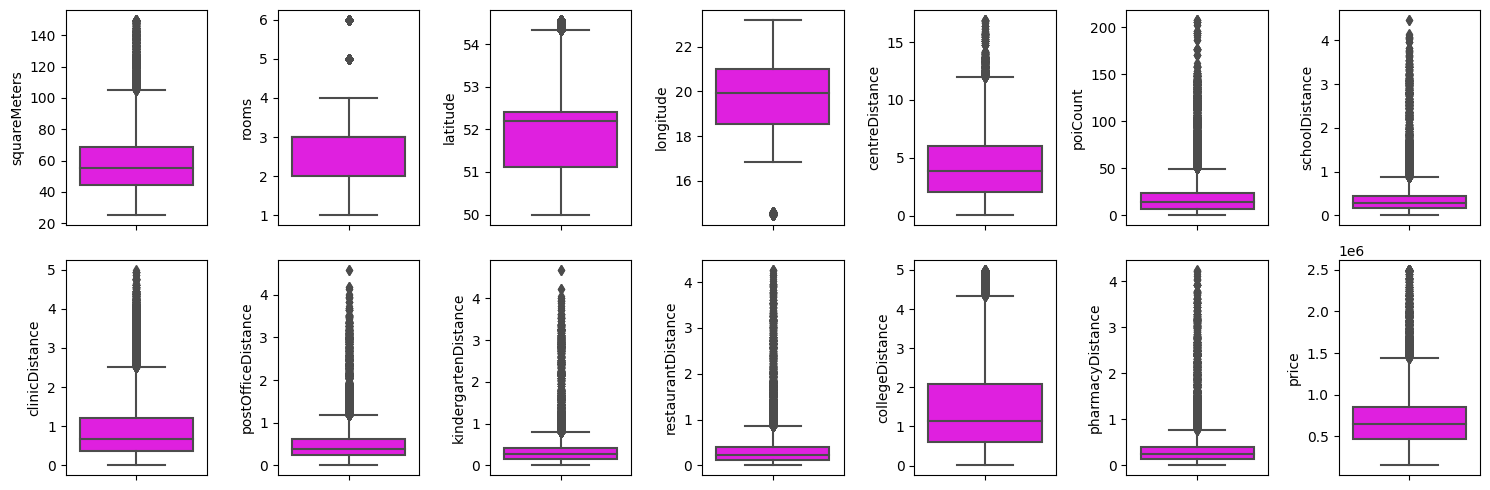

In [23]:
features = num_cols.to_list()
plt.figure(figsize=(15,5))
for i in range(0, len(features)):
    plt.subplot(2, 7, i + 1)
    sns.boxplot(y = df_clean[features[i]], color = 'magenta', orient = 'v')
    plt.tight_layout()

- It's important to notice that although boxplot indicates outliers, some of them seem to be natural values and should leave them as it is.

## Univariate Analysis - Dist Plots

/tmp/ipykernel_20/11191105.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/11191105.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/11191105.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/11191105.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/11191105.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/11191105.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/11191105.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/11191105.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/11191105.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/11191105.py:6: UserWarning: 

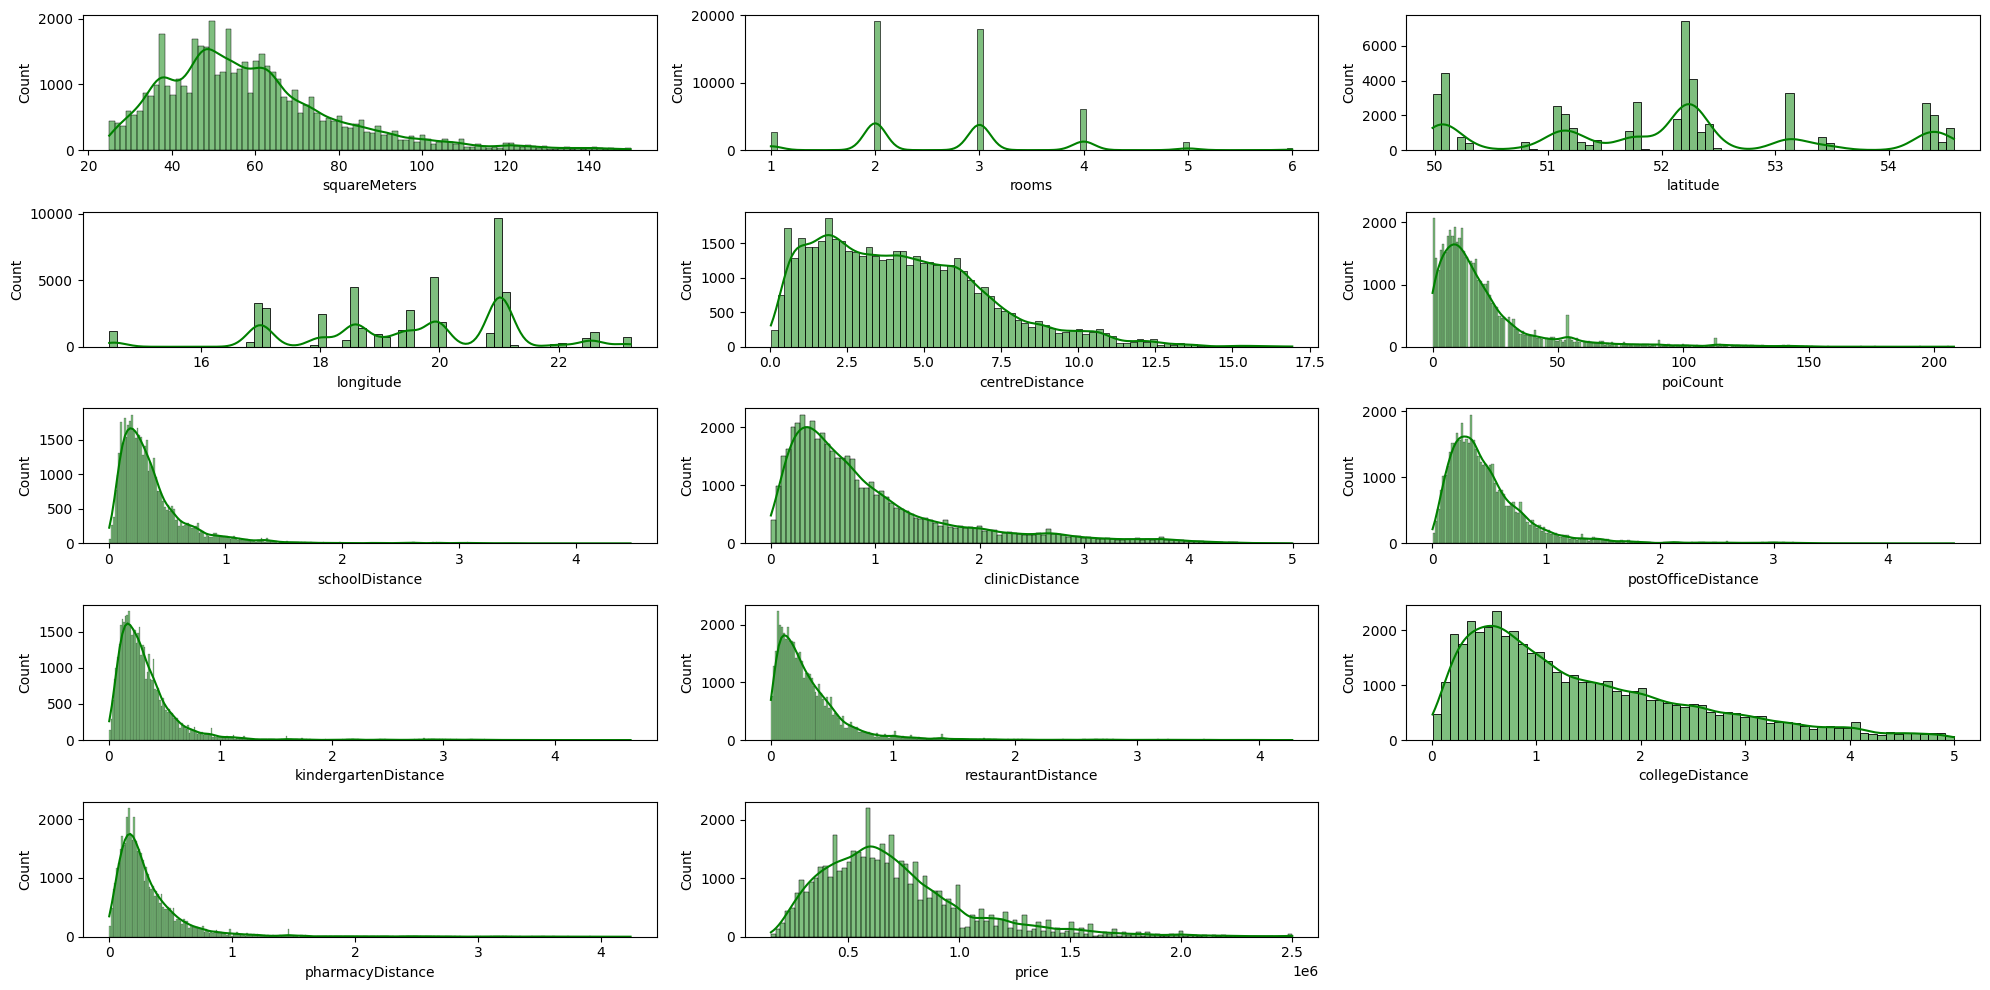

In [24]:
features = num_cols.to_list()
plt.figure(figsize = (20, 10))
for i in range(0, len(features)):
    plt.subplot(5, 3, i+1)
    sns.histplot(x = df_clean[features[i]], kde = True, color = 'green')
    plt.tight_layout()

## Univariate Analysis - Violin Plots

/tmp/ipykernel_20/2778898491.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/2778898491.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/2778898491.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/2778898491.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/2778898491.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/2778898491.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/2778898491.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/2778898491.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/2778898491.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/2778898491

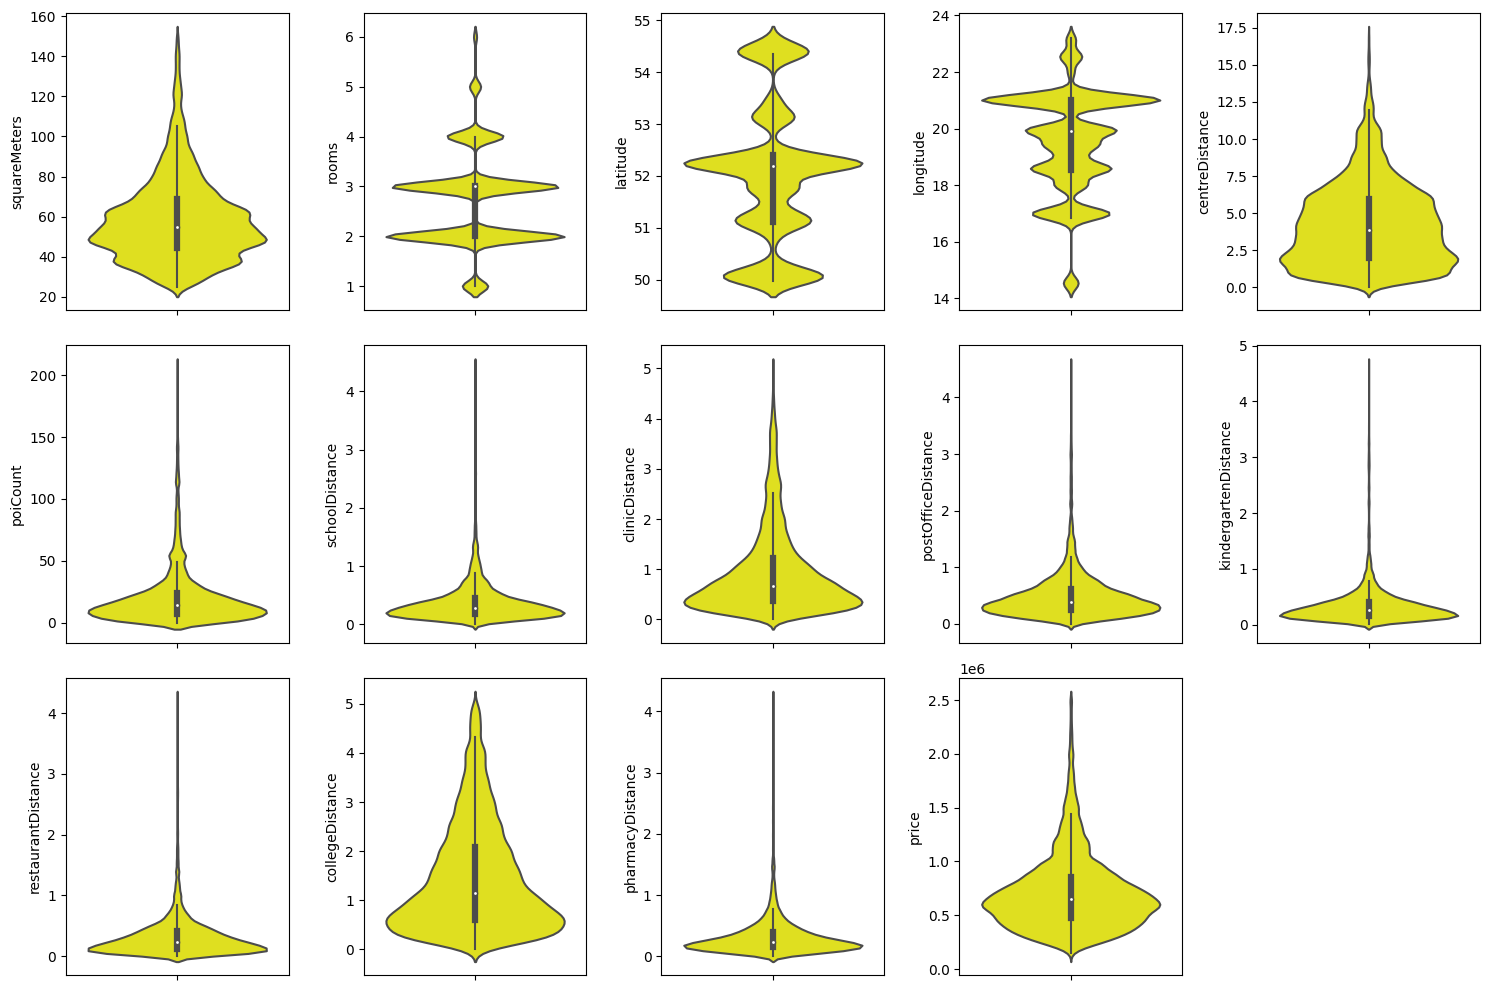

In [25]:
plt.figure(figsize=(15,10))
features = num_cols.to_list()
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.violinplot(y = df_clean[features[i]], color = 'yellow', orient = 'v')
    plt.tight_layout()

## Univariate Analysis - Count Plot (Categorical)

/tmp/ipykernel_20/1886454742.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/1886454742.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/1886454742.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/1886454742.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/1886454742.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/1886454742.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/1886454742.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


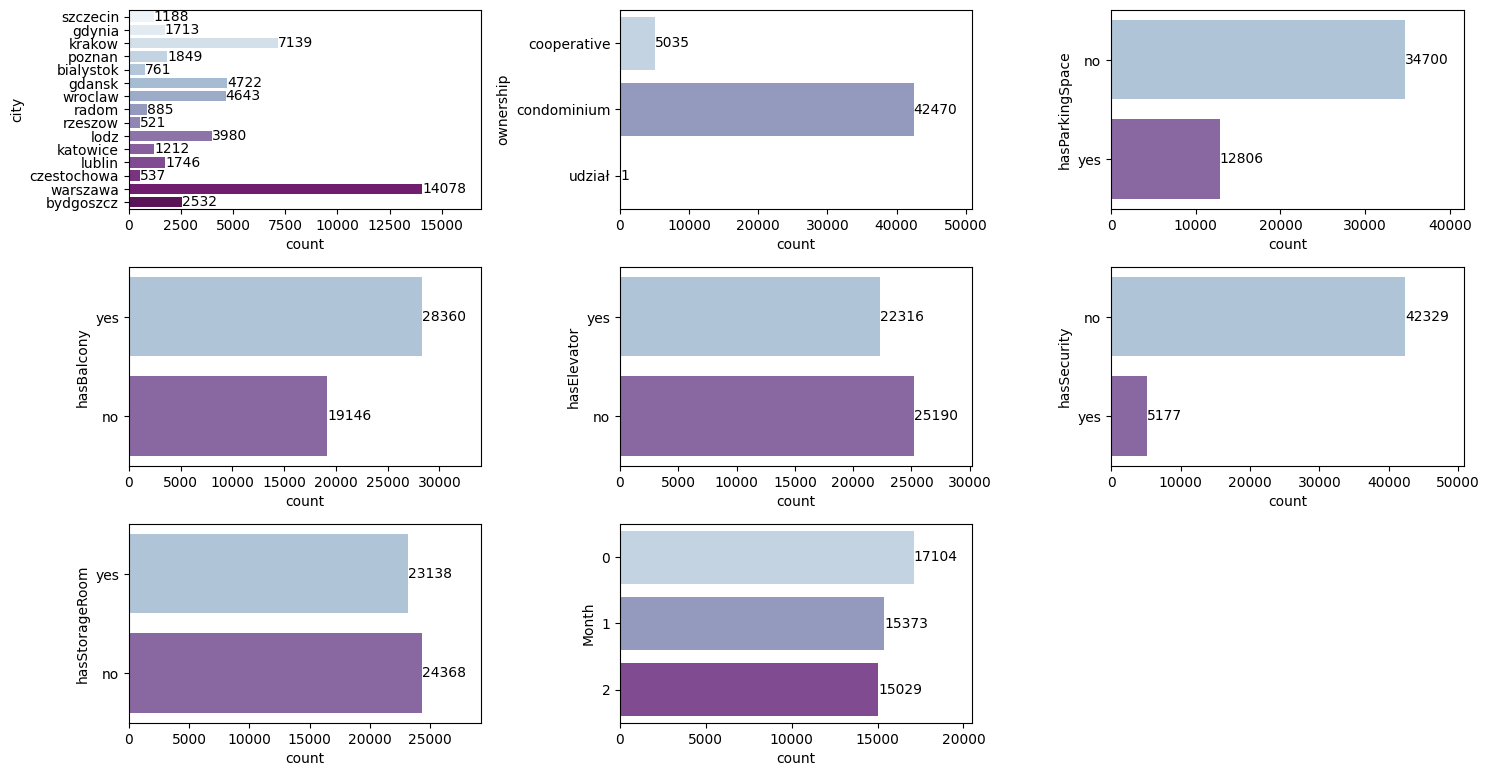

In [26]:
plt.figure(figsize=(15,10))
for i in range(0, len(df_cats.columns)):
    plt.subplot(4, 3, i+1)
    ax = sns.countplot(y = df_clean[df_cats.columns[i]], palette = 'BuPu', orient = 'v')
    ax.set_xlim(0,df_clean[df_cats.columns[i]].value_counts().max()+df_clean[df_cats.columns[i]].value_counts().max()*0.2)
    ax.bar_label(ax.containers[0]);
    plt.tight_layout()

## Bivariate Analysis - Correlation Map

In [27]:
df_nums.corr()

,squareMeters,rooms,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
squareMeters,1.000000,0.823454,0.019918,-0.008834,0.077953,0.014797,0.061593,0.004529,0.041154,0.054183,0.014935,0.050457,0.049010,0.631668
rooms,0.823454,1.000000,0.020927,0.010483,0.076015,-0.018446,0.070778,0.036103,0.049730,0.055580,0.045107,0.065654,0.060456,0.489853
latitude,0.019918,0.020927,1.000000,-0.208511,0.067688,-0.031397,0.144596,0.101040,0.093426,0.183060,0.143036,0.119145,0.135767,0.016830
longitude,-0.008834,0.010483,-0.208511,1.000000,0.199924,0.028391,-0.094491,-0.068975,-0.038926,-0.134209,-0.103319,-0.006732,-0.049718,0.204092
centreDistance,0.077953,0.076015,0.067688,0.199924,1.000000,-0.448479,0.278505,0.409028,0.237292,0.099567,0.216064,0.548856,0.246426,0.136581
poiCount,0.014797,-0.018446,-0.031397,0.028391,-0.448479,1.000000,-0.323400,-0.372230,-0.339967,-0.211151,-0.379885,-0.441988,-0.325230,0.169016
schoolDistance,0.061593,0.070778,0.144596,-0.094491,0.278505,-0.323400,1.000000,0.527001,0.669175,0.711942,0.674199,0.423134,0.726965,0.012972
clinicDistance,0.004529,0.036103,0.101040,-0.068975,0.409028,-0.372230,0.527001,1.000000,0.448623,0.403683,0.501685,0.502656,0.480539,-0.117423
postOfficeDistance,0.041154,0.049730,0.093426,-0.038926,0.237292,-0.339967,0.669175,0.448623,1.000000,0.642564,0.688399,0.326807,0.740413,-0.019484
kindergartenDistance,0.054183,0.055580,0.183060,-0.134209,0.099567,-0.211151,0.711942,0.403683,0.642564,1.000000,0.678931,0.261575,0.767473,-0.020406


In [28]:
corr_df = df_nums.corr()

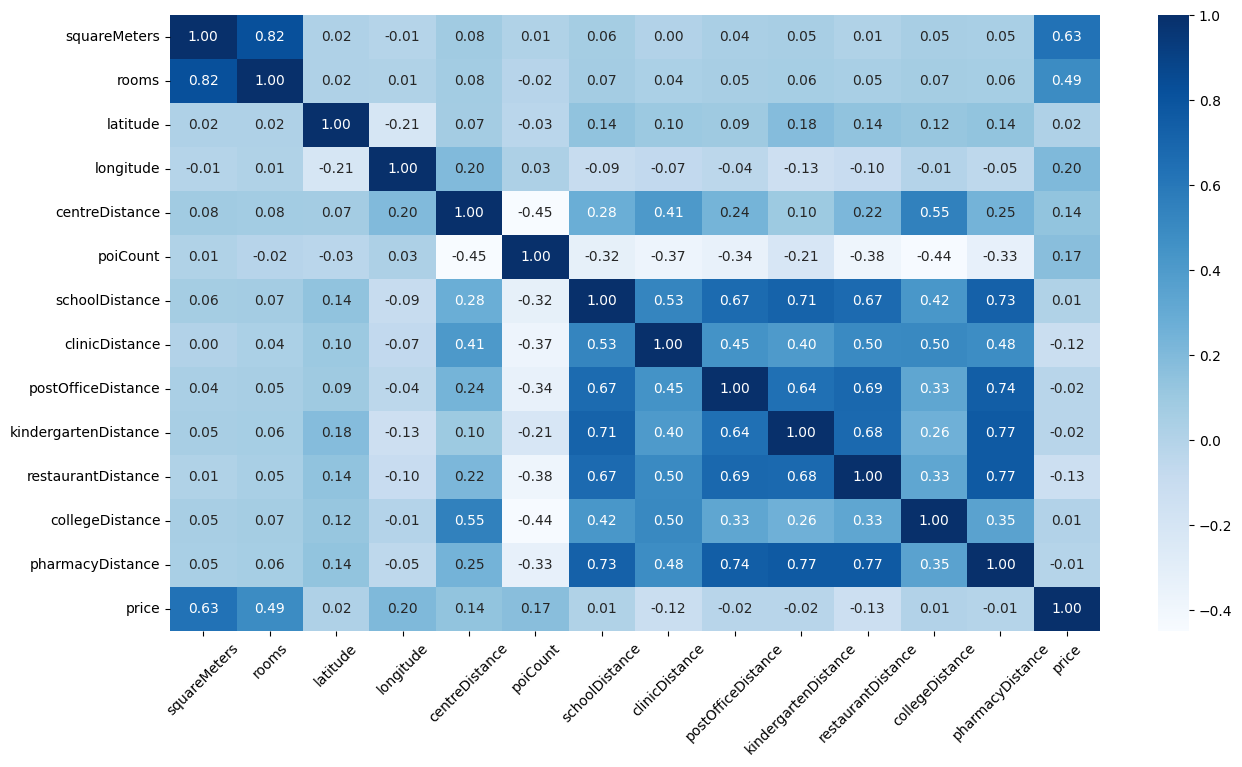

In [29]:
plt.figure(figsize = (15, 8))
sns.heatmap(corr_df, cmap = 'Blues', annot = True, fmt = '.2f')
plt.xticks(rotation=45);

In [30]:
df_clean[df_cats.columns] = df_clean[df_cats.columns].apply(LabelEncoder().fit_transform)

In [31]:
df_clean.head()

,city,squareMeters,rooms,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,...,collegeDistance,pharmacyDistance,ownership,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,Month
0,12,36.00,2.0,53.442692,14.559690,2.15,16.0,0.273,0.492,0.652,...,1.404,0.205,1,0,1,1,0,1,395995,0
1,12,73.02,3.0,53.452222,14.553333,3.24,9.0,0.275,0.672,0.367,...,1.857,0.280,0,0,0,0,0,0,565000,0
2,12,87.60,3.0,53.435100,14.532900,2.27,32.0,0.175,0.259,0.223,...,0.310,0.087,0,1,1,0,0,1,640000,0
3,12,66.00,3.0,53.410278,14.503611,4.07,1.0,0.218,1.690,0.504,...,2.138,0.514,0,0,0,0,0,0,759000,0
4,12,63.30,3.0,53.463100,14.572800,4.48,10.0,0.079,1.224,0.737,...,0.377,0.745,1,1,1,0,0,1,499000,0


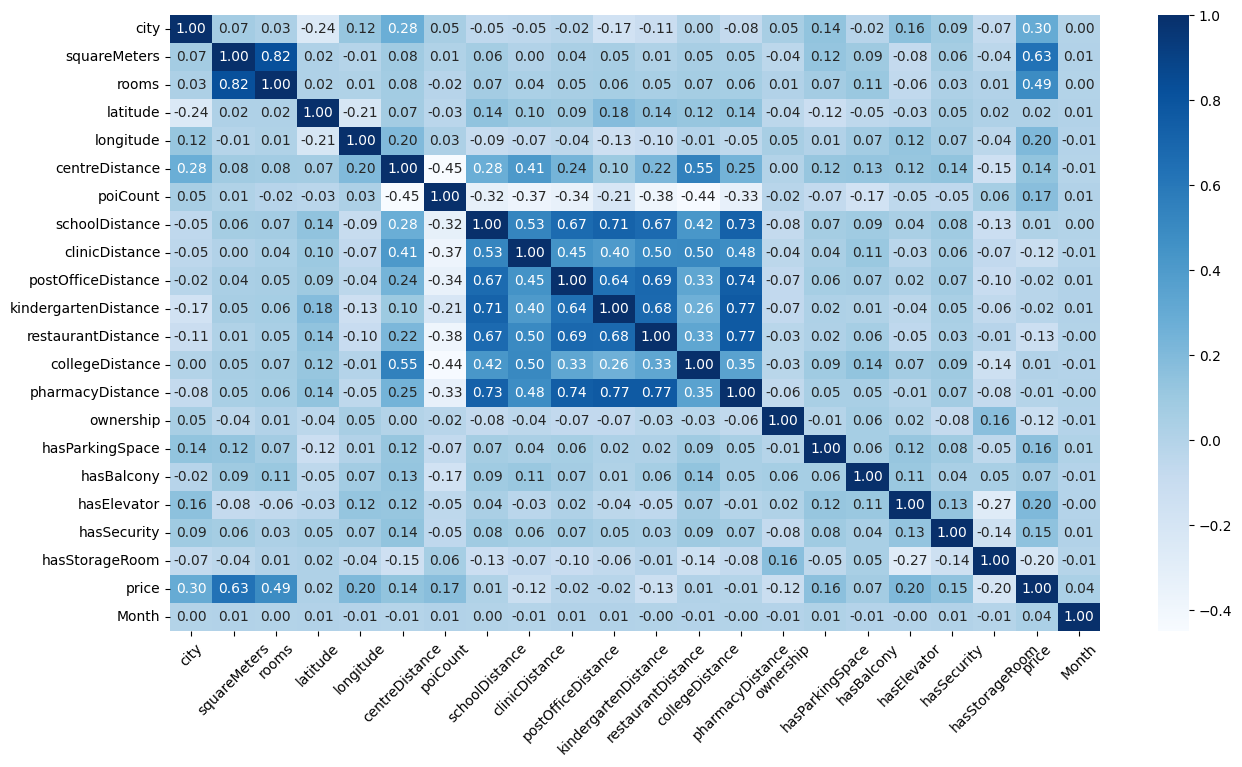

In [32]:
plt.figure(figsize = (15, 8))
sns.heatmap(df_clean.corr(), cmap = 'Blues', annot = True, fmt = '.2f')
plt.xticks(rotation=45);

<a id="section6"></a>
# Machine Learning

## Feature Selection

In [33]:
# Dropping low correlation columns (interestingly, some of them have high multicollinearity)
df_clean.drop(['schoolDistance','latitude', 'postOfficeDistance',
               'kindergartenDistance', 'collegeDistance', 'pharmacyDistance', 'hasBalcony','Month'], axis=1, inplace=True)

In [34]:
# Dropping rooms column because it has a high multicolinearity with squareMeters columns
df_clean.drop(['rooms'], axis=1, inplace=True)

### Using Random Forest Classifier to Check the Most Important Features

In [35]:
X = df_clean.loc[:, df_clean.columns != 'price']
y = df_clean['price'].values

In [36]:
clf = RandomForestClassifier(n_estimators=10, random_state=0, max_depth=9, n_jobs=-1)

clf.fit(X, y)

RandomForestClassifier(max_depth=9, n_estimators=10, n_jobs=-1, random_state=0)

In [37]:
feature_scores = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_scores

squareMeters          0.214433
longitude             0.174062
centreDistance        0.143809
clinicDistance        0.110131
poiCount              0.104650
restaurantDistance    0.093936
city                  0.063081
hasElevator           0.027054
hasStorageRoom        0.023288
hasParkingSpace       0.017887
ownership             0.015525
hasSecurity           0.012145
dtype: float64

<BarContainer object of 12 artists>

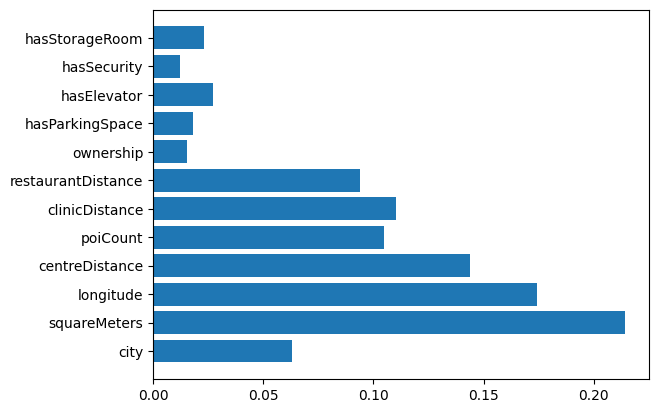

In [38]:
plt.barh(X.columns, clf.feature_importances_)

## Linear Regression

### Using X1

In [39]:
X1 = df_clean.loc[:, df_clean.columns != 'price']
y1 = df_clean['price'].values

In [40]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state = 42)

In [41]:
scaler = StandardScaler()

In [42]:
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.fit_transform(X1_test)

In [43]:
model = linear_model.LinearRegression(fit_intercept = True)

In [44]:
model_v1_lm = model.fit(X1_train_scaled, y1_train)

In [45]:
# Calculating the R2 metric of our model
r2_score(y1_test, model_v1_lm.fit(X1_train_scaled, y1_train).predict(X1_test_scaled))

0.5784683510199163

### Using X2

In [46]:
X2 = df_clean[['squareMeters', 'longitude', 'centreDistance']]
y2 = df_clean['price']

In [47]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.25, random_state = 42)

In [48]:
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.fit_transform(X2_test)

In [49]:
model_v2_lm = model.fit(X2_train_scaled, y2_train)

In [50]:
# Calculating the R2 metric
r2_score(y2_test, model_v2_lm.fit(X2_train_scaled, y2_train).predict(X2_test_scaled))

0.4333271662417286

- X2 had lower R2 score, but it's a way simpler model (containing less predictor variables), which makes it more generalizable 

## Random Forest

In [51]:
# Creating Random Forest Model
rf1 = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, random_state = 101, n_jobs=-1, max_depth=9, oob_score=True)

### Using X1

In [52]:
model_rf_v1 = rf1.fit(X1_train_scaled, y1_train)

In [53]:
prediction = model_rf_v1.predict(X1_test_scaled)

In [54]:
mean_squared_error(y1_test, prediction)

21699119252.977814

In [55]:
mean_absolute_error(y1_test, prediction)

104124.77819386296

In [56]:
r2_score(y1_test, prediction)

0.8213139408228141

### Using X2

In [57]:
model_rf_v2 = rf1.fit(X2_train_scaled, y2_train)

In [58]:
prediction = model_rf_v2.predict(X2_test_scaled)

In [59]:
mean_squared_error(y2_test, prediction)

24105717361.022766

In [60]:
mean_absolute_error(y2_test, prediction)

109498.70372417054

In [61]:
r2_score(y1_test, prediction)

0.8014962916852431

- X1 and X2 had similar performances. X2 being a simpler model, it would be chosen.

### Finding the best n_estimator

In [62]:
N_estimators = [5,50,100,200,500,1000]
R2_score = []
for n_estimator in N_estimators:
    model = RandomForestRegressor(n_estimators = n_estimator,max_depth = 9)
    model.fit(X2_train_scaled, y2_train)
    prediction = model.predict(X2_test_scaled)
    r2_calc = r2_score(y2_test, prediction)
    R2_score.append(r2_calc)
    print(f'For {n_estimator} n_estimator and the R2 score is: ', r2_calc)


For 5 n_estimator and the R2 score is:  0.7955765648123828
For 50 n_estimator and the R2 score is:  0.8049662582314283
For 100 n_estimator and the R2 score is:  0.8048928142751448
For 200 n_estimator and the R2 score is:  0.8056439711212078
For 500 n_estimator and the R2 score is:  0.805220174846863
For 1000 n_estimator and the R2 score is:  0.8051035689618082


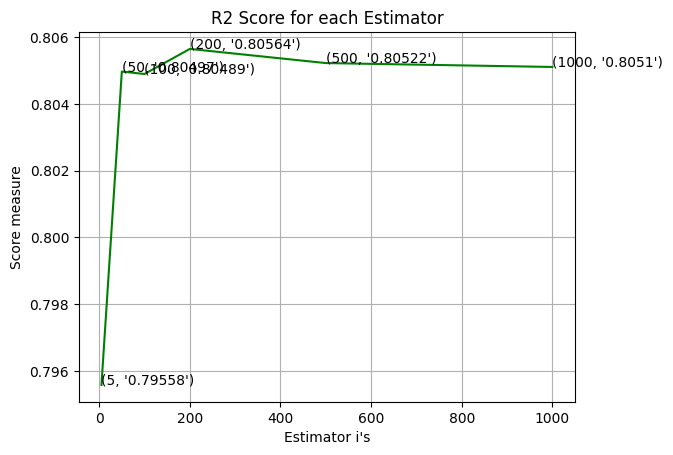

In [63]:
fig, ax = plt.subplots()
ax.plot(N_estimators, R2_score,c='g')
for i, txt in enumerate(np.round(R2_score,5)):
    ax.annotate((N_estimators[i],str(txt)), (N_estimators[i],R2_score[i]))
plt.grid()
plt.title("R2 Score for each Estimator")
plt.xlabel("Estimator i's")
plt.ylabel("Score measure")
plt.show()

## XGBRegressor

In [68]:
model = XGBRegressor(n_estimators=200, max_depth=6, eval_metric=["auc", "error", "error@0.6"])

In [69]:
model.fit(X2_train_scaled, y2_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False,
             eval_metric=['auc', 'error', 'error@0.6'], feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [70]:
prediction = model.predict(X2_test_scaled)

In [71]:
print(r2_score(y2_test, prediction))

0.8138431029554611


In [72]:
print(mean_squared_error(y2_test, prediction))

print(mean_absolute_error(y2_test, prediction))

22606356239.17494
105723.4255151764


<a id="section7"></a>
# Conclusion

- X2 selected features not always returned better evaluation metrics, but being a way simpler model, it should be chosen since its more generalizable.
- Among all the algorithms XGBoost Regressor had better results.
- Tuning hyperparameters might return better results.